In [54]:
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from math import ceil
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import parallel_coordinates
#Advanced optimization
from scipy import optimize as op

#Load Data
data = pd.read_csv('train.csv')
dd=pd.read_csv('train.csv')


In [55]:
data.head()

ID            Dates        Category                      Descript  \
0   1  5/13/2015 23:53        WARRANTS                WARRANT ARREST   
1   2  5/13/2015 23:53  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2   3  5/13/2015 23:33  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3   4  5/13/2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4   5  5/13/2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [56]:
c=(pd.value_counts(data['Category']),'or') 
print (c)
accuracies=[]

(LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS

In [57]:
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES'])])


classes = ['LARCENY/THEFT', 'OTHER OFFENSES']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 2

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution','Address'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [58]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = len(str(y))
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x

In [59]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for cla in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == cla, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [60]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for eachc crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]
acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  82.49165518043078 %


In [61]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

[[31647  3218]
 [ 7325 18027]]


In [64]:

plot_confusion_matrix(cfm, classes=classes,
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[31647  3218]
 [ 7325 18027]]


In [65]:
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT'])])


classes = ['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL','ASSAULT']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 4

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution','Address'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [66]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for category in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == category, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [67]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  60.67430066026602 %


[[29873  3178  1806    26]
 [ 6489 17855   634   142]
 [10313   850  6903   405]
 [ 4506  3795  4843  2435]]


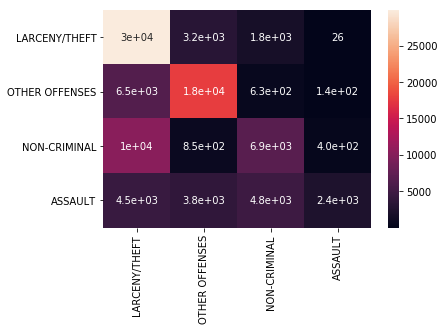

In [68]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

In [69]:
plot_confusion_matrix(cfm, classes=classes,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[29873  3178  1806    26]
 [ 6489 17855   634   142]
 [10313   850  6903   405]
 [ 4506  3795  4843  2435]]


In [70]:
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT'])])

classes = ['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT']


#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 6

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution','Address'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values

# Categories values 
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [71]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for category in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == category, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [72]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  47.131994844424455 %


[[24845  3081  4715    24     1  2203]
 [ 5262 16773   620   629   526  1428]
 [12359   836  4359   320     6   643]
 [ 4657  4056  3331  1841    35  1685]
 [  857  9516     9     9    19   263]
 [ 3523   449    54     4    16  6649]]


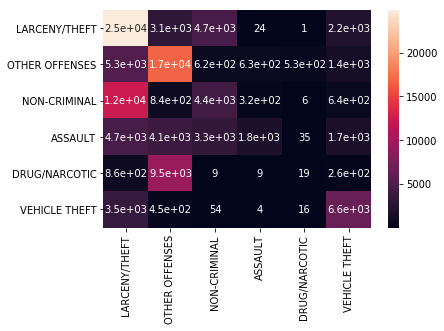

In [73]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

In [74]:
plot_confusion_matrix(cfm, classes=classes,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[24845  3081  4715    24     1  2203]
 [ 5262 16773   620   629   526  1428]
 [12359   836  4359   320     6   643]
 [ 4657  4056  3331  1841    35  1685]
 [  857  9516     9     9    19   263]
 [ 3523   449    54     4    16  6649]]


In [75]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS'])])


classes = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 8

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [76]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for crime in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == crime, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [77]:
print (len(all_theta))

8


In [78]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  39.761337233346616 %


In [79]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

[[24999  3171  4748    29     0  2158     0     4]
 [ 5418 15307   834  1429    31  1113     0  1088]
 [12180   839  4597   297     0   337     0    50]
 [ 4152  3881  3903  1884     1  1459     0   122]
 [  885  8955    11    28     0   198     0   626]
 [ 4691   376    53    12     1  5664     0    81]
 [ 7019   885     7     3     2   982     0     2]
 [  312  7335    50     6   122   226     0   428]]


Confusion matrix, without normalization
[[24999  3171  4748    29     0  2158     0     4]
 [ 5418 15307   834  1429    31  1113     0  1088]
 [12180   839  4597   297     0   337     0    50]
 [ 4152  3881  3903  1884     1  1459     0   122]
 [  885  8955    11    28     0   198     0   626]
 [ 4691   376    53    12     1  5664     0    81]
 [ 7019   885     7     3     2   982     0     2]
 [  312  7335    50     6   122   226     0   428]]


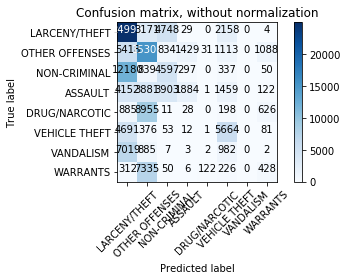

In [80]:
plot_confusion_matrix(cfm, classes=classes,
                      title='Confusion matrix, without normalization')

In [156]:
# 10 classes
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC'])])


classes = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 10

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [157]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for crime in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == crime, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [158]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  37.752770673486786 %


In [159]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

[[26976  3122  2999    44     0  1830     0     2     5     0]
 [ 5716 16269   466   674     0  1218     0   787    23     0]
 [12546   879  4325   301     0   436     0    27     8     0]
 [ 4475  3415  3824  2519     0  1213     0   139    30     0]
 [  931  9556    11    21     0   180     0    41     0     0]
 [ 5392   388    51    11     0  4827     0    60     0     0]
 [ 6990   881     6    10     2  1011     0     2     1     0]
 [  345  7482    39     5     0   211     0   433     2     0]
 [ 3146   643  3062   378     0    11     0     0     6     0]
 [ 3593   323   117     0     0  2160     0    29     0     0]]


In [160]:
# 12 classes
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC','MISSING PERSON','ROBBERY'])])


classes = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC','MISSING PERSON','ROBBERY']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 12

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [161]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for crime in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == crime, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [162]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  36.38723205666686 %


[[27361  3070  3693    37     0   770     0     3     2     0     0     0]
 [ 5571 17084   659    91     1  1012     0   756    19     0     0     0]
 [12343   806  4505   259     0   311     0    38     8     0     0     0]
 [ 4694  3774  3494  2074     0  1217     0   127    25     0     0     0]
 [  902  9722    14     5     0   198     0    53     0     0     0     0]
 [ 4956   361    58     6     0  5488     0    66     0     0     0     0]
 [ 7033   940    80     3     0   896     0     4     0     0     0     0]
 [  333  7437    44     9     0   226     0   401     1     0     0     0]
 [ 3669   754  2644   281     0    17     0     0     5     0     0     0]
 [ 3629   360   121     3     0  2111     0    33     0     0     0     0]
 [ 3869   136   414     9     0   647     0     3     1     0     0     0]
 [ 2384   788   375   101     0  1000     0    26     3     0     0     0]]


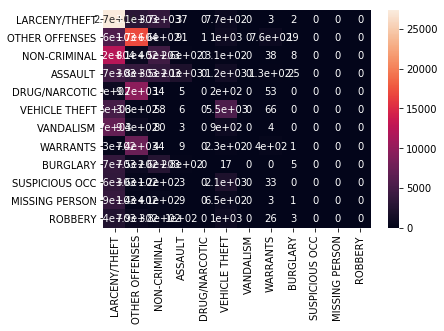

In [163]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

In [164]:
# 14 classes
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data=(data.loc[data['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC','MISSING PERSON','ROBBERY','FRAUD','FORGERY/COUNTERFEITING'])])


classes = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC','MISSING PERSON','ROBBERY','FRAUD','FORGERY/COUNTERFEITING']

#Number of examples
m = data.shape[0]
#Features
n = 4
#Number of classes
k = 14

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Dates','Resolution'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [165]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for crime in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == crime, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [166]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  36.02050901902644 %


In [167]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

[[29557  3106  1677    44     0   856     0     2     1     0     0     0
      0     0]
 [ 5667 17008   489   115     2  1147     0   673    26     0     0     0
      0     0]
 [12364   873  4336   266     0   463     0     8     6     0     0     0
      0     0]
 [ 4386  3674  3778  2248     0  1232     0    88    32     0     0     0
      0     0]
 [  944  9575     9     8     0   183     0    30     0     0     0     0
      0     0]
 [ 5574   417    55    10     0  4695     0    20     0     0     0     0
      0     0]
 [ 7117   948     6     6     1   989     0     2     1     0     0     0
      0     0]
 [  303  7417    38     8     0   209     0   457     1     0     0     0
      0     0]
 [ 2813   747  3373   329     0    17     0     0     9     0     0     0
      0     0]
 [ 3557   396   124     0     0  2113     0    15     0     0     0     0
      0     0]
 [ 3894   156   388     6     0   708     0     2     3     0     0     0
      0     0]
 [ 2306   809   347  

In [168]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')

classes = ['LARCENY/THEFT', 'OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT','VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC','MISSING PERSON','ROBBERY','FRAUD','FORGERY/COUNTERFEITING','SECONDARY CODES','WEAPON LAWS','PROSTITUTION','TRESPASS','STOLEN PROPERTY','SEX OFFENSES FORCIBLE','DISORDERLY CONDUCT','DRUNKENNESS','RECOVERED VEHICLE','KIDNAPPING','DRIVING UNDER THE INFLUENCE','RUNAWAY','LIQUOR LAWS','ARSON','LOITERING','EMBEZZLEMENT','SUICIDE','FAMILY OFFENSES','BAD CHECKS','BRIBERY','EXTORTION','SEX OFFENSES NON FORCIBLE','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA']

#Number of examples
m = data.shape[0]
#Features
n = 8
#Number of classes
k = 39

def dataCoder(data, categories):
    encoder = LabelEncoder()
    for categ in categories:
        encoder.fit(data[categ])
        data[categ] = encoder.transform(data[categ])
    return data

X = np.ones((m,n + 1))
data2 = dataCoder(data, ['Descript', 'DayOfWeek','PdDistrict','Resolution','Dates','Address','Y','X'])  

y = np.array((m,1))
X[:,1] = data['Descript'].values
X[:,2] = data['DayOfWeek'].values
X[:,3] = data['Resolution'].values
X[:,4] = data['PdDistrict'].values
X[:,5] = data['Dates'].values
X[:,6] = data['Address'].values
X[:,7] = data['Y'].values
X[:,8] = data['X'].values


#Labels
y = data['Category'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [169]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for crime in classes:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == crime, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [170]:
#Prediction

P = sigmoid(X_test.dot(all_theta.T)) #probability for each crime
p = [classes[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

acc=accuracy_score(y_test, p) * 100
#accuracies.append(acc)
print("Test Accuracy ", acc , '%')

Test Accuracy  35.48886737657308 %


In [171]:
cfm = confusion_matrix(y_test, p, labels = classes)

print (cfm)
sb.heatmap(cfm, annot = True, xticklabels = classes, yticklabels = classes);

[[29970  2812   969 ...     2     0     0]
 [ 5855 15949   369 ...     1     0     0]
 [11531   623  4751 ...     0     0     0]
 ...
 [   11    16     3 ...     0     0     0]
 [    5     1     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [172]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
# TODO: plot rewards rtra       
        
x=[2,4,6,8,10,12,14]
y=list(range(100))
plt.plot(x,accuracies)
plt.plot(x,accuracies,'o')
    
#plt.plot(rtrace,1000,'r')    
plt.ylabel("Accuracy Score")
plt.xlabel("Classes")

Text(0.5,0,'Classes')

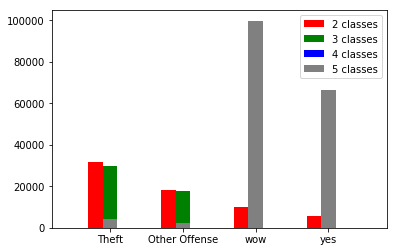

In [103]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df = pandas.DataFrame(dict(graph=['Theft', 'Other Offense','Non-Criminal',"Assault"],
                           n=[31647, 18027,10000,5554], m=[29873, 17855,15000,66454 ],c=[4444,2222,7777,8857],v=[4444,2332,99829,66454])) 

ind = np.arange(len(df))
width = 0.2

fig, ax = plt.subplots()
ax.bar(ind , df.n, width, color='red', label='2 classes')
ax.bar(ind + width, df.m, width, color='green', label='3 classes')



ax.set(xticks=ind + width, xticklabels=df.graph, xlim=[2*width - 1, len(df)])
ax.legend()

plt.show()

In [107]:
data.head()

ID   Dates        Category  Descript  DayOfWeek  PdDistrict  Resolution  \
0   1  201661        WARRANTS       449          6           4           0   
1   2  201661  OTHER OFFENSES       405          6           4           0   
2   3  201660  OTHER OFFENSES       405          6           4           0   
3   4  201659   LARCENY/THEFT       167          6           4          11   
4   5  201659   LARCENY/THEFT       167          6           5          11   

                     Address           X          Y  
0         OAK ST / LAGUNA ST -122.425892  37.774599  
1         OAK ST / LAGUNA ST -122.425892  37.774599  
2  VANNESS AV / GREENWICH ST -122.424363  37.800414  
3   1500 Block of LOMBARD ST -122.426995  37.800873  
4  100 Block of BRODERICK ST -122.438738  37.771541

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv("data.csv", parse_dates=True, delim_whitespace=True)

ax = data.iloc[:,[3,4,5]].plot(kind='bar')
df.iloc[:,12].plot(linestyle='-', marker='o', ax = ax)

ax.set_xticklabels(df.DateTime, rotation=40) 
plt.show()

In [2]:
import numpy 

dpoints = np.array([['rosetta', '1mfq', 9.97],
           ['rosetta', '1gid', 27.31],
           ['rosetta', '1y26', 5.77],
           ['rnacomposer', '1mfq', 5.55],
           ['rnacomposer', '1gid', 37.74],
           ['rnacomposer', '1y26', 5.77],
           ['random', '1mfq', 10.32],
           ['random', '1gid', 31.46],
           ['random', '1y26', 18.16]])

width: 0.2333333333333333
cond: random
cond: rnacomposer
cond: rosetta


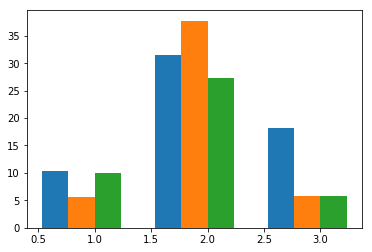

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.3

conditions = np.unique(dpoints[:,0])
categories = np.unique(dpoints[:,1])

n = len(conditions)

width = (1 - space) / (len(conditions))
print ("width:", width)

for i,cond in enumerate(conditions):
    print ("cond:", cond)
    vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width=width)



In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o

import numpy as np

dpoints = np.array([['2 Crimes', 'Theft', 33647],
           ['2 Crimes', 'Other Assult', 19027],
           ['2 Crimes', 'Non-Criminal', 0],
           ['4 Crimes', 'Theft', 27873],
           ['4 Crimes', 'Other Assult', 16855],
           ['4 Crimes', 'Non-Criminal', 6903 ],
           ['6 Crimes', 'Theft', 23845 ],
           ['6 Crimes', 'Other Assult', 15773],
           ['6 Crimes', 'Non-Criminal', 3359]])

fig = plt.figure()
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

    # the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=cond, 
               color=cm.Accent(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=90)
    
    # Add the axis labels
    ax.set_ylabel("True Positive")
    ax.set_xlabel("Crime")
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')
        
barplot(ax, dpoints)
savefig('barchart_3.png')
plt.show()

NameError: name 'savefig' is not defined